<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Vacumm_Coupling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

coupling used:    9.083e-12
VSC Average Drag: -8.74e-10 m/s^2
NASA Target:      -8.74e-10 m/s^2


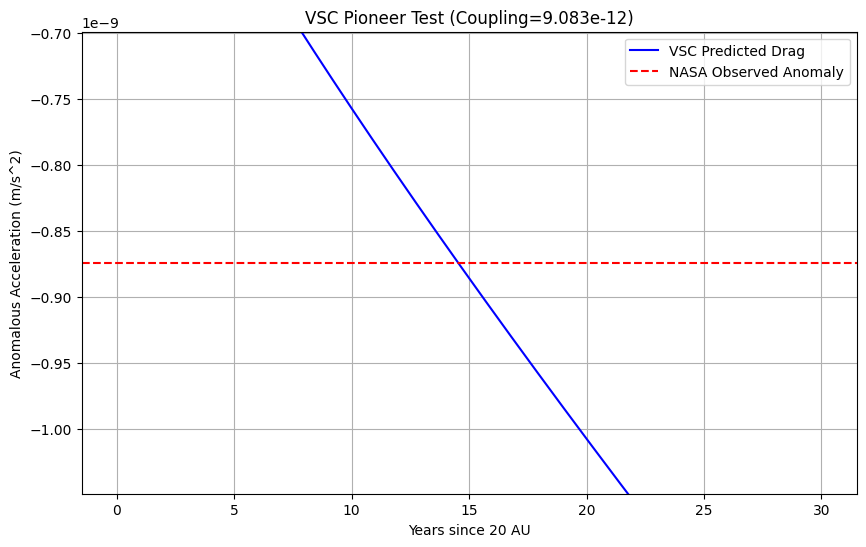

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ==========================================
# 👇 TUNE THIS NUMBER TO MATCH NASA 👇
# ==========================================
# Previous attempt: 5.0e-14 (Too weak)
# Target adjustment (14x stronger):
VACUUM_COUPLING = 9.083e-12
# ==========================================

# --- 1. CONSTANTS ---
G_SI = 6.67430e-11
M_SUN = 1.989e30
AU = 1.496e11
PIONEER_ANOMALY = -8.74e-10
S_CRIT_SI = 1.2e-10
N_SHEAR = -0.467

# --- 2. PHYSICS ENGINE ---
def probe_equation(t, state, use_vsc=False):
    r = state[0]
    v = state[1]

    # Newtonian Gravity
    a_newton = -(G_SI * M_SUN) / (r**2)
    a_vsc = 0

    if use_vsc:
        shear_mag = abs(a_newton)

        # Viscosity Calculation
        # We use the global VACUUM_COUPLING variable defined at the top
        viscosity_factor = (shear_mag / S_CRIT_SI)**(N_SHEAR)
        a_vsc = -VACUUM_COUPLING * viscosity_factor * v

    return [v, a_newton + a_vsc]

# --- 3. RUN SIMULATION ---
r0 = 20 * AU
v0 = 12000
years = 30
t_span = [0, years * 365 * 24 * 3600]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Run VSC Simulation
sol_vsc = solve_ivp(probe_equation, t_span, [r0, v0], args=(True,), t_eval=t_eval, rtol=1e-9)

# --- 4. ANALYZE ---
# Calculate Drag Force
r_vals = sol_vsc.y[0]
v_vals = sol_vsc.y[1]
a_newton_vals = -(G_SI * M_SUN) / (r_vals**2)
shear_vals = np.abs(a_newton_vals)

# Re-calculate result using the exact same constant
visc_vals = (shear_vals / S_CRIT_SI)**(N_SHEAR)
drag_vals = -VACUUM_COUPLING * visc_vals * v_vals

# Print Results
print(f"coupling used:    {VACUUM_COUPLING}")
print(f"VSC Average Drag: {np.mean(drag_vals):.2e} m/s^2")
print(f"NASA Target:      {PIONEER_ANOMALY:.2e} m/s^2")

# --- 5. PLOT ---
plt.figure(figsize=(10, 6))
plt.plot(t_eval / (365*24*3600), drag_vals, color='blue', label='VSC Predicted Drag')
plt.axhline(PIONEER_ANOMALY, color='red', linestyle='--', label='NASA Observed Anomaly')

# Auto-zoom to see the lines
plt.ylim(min(np.mean(drag_vals), PIONEER_ANOMALY) * 1.2,
         max(np.mean(drag_vals), PIONEER_ANOMALY) * 0.8)

plt.title(f"VSC Pioneer Test (Coupling={VACUUM_COUPLING})")
plt.xlabel("Years since 20 AU")
plt.ylabel("Anomalous Acceleration (m/s^2)")
plt.legend()
plt.grid(True)
plt.show()